**MScFE 600 FINANCIAL DATA** \\
**Group Work Project #1** \\
**Group Number 11231 ** \\
\\


TASK 3

Explained Variance
Component 1: 0.2698 (26.98%)
Component 2: 0.2087 (20.87%)
Component 3: 0.1906 (19.06%)
Component 4: 0.1797 (17.97%)
Component 5: 0.1513 (15.13%)


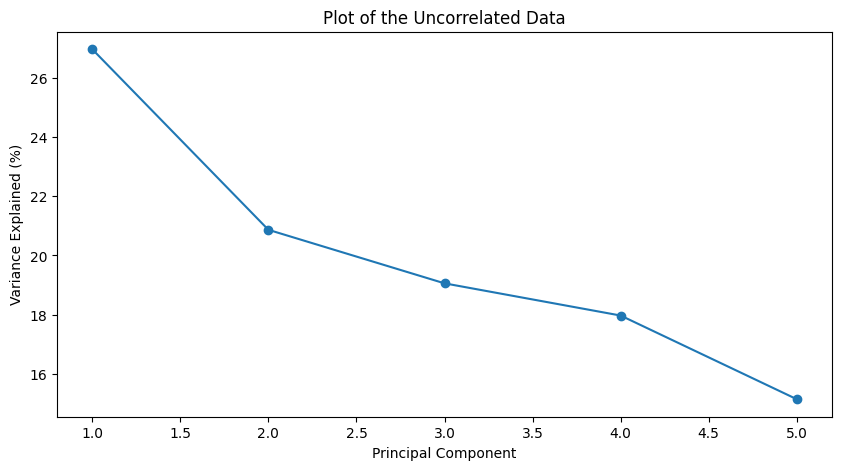

In [1]:
 # 3 a-d : Simulate 5 uncorrelated Gaussian variables a
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

np.random.seed(42)
days = 120
mean, std_dev = 0, 0.01

# a-Generate 5 uncorrelated Gaussian random variables
data = np.random.normal(mean, std_dev, (days, 5))
df_sim = pd.DataFrame(data, columns=[f'Y{i+1}' for i in range(5)])

# b- PCA using the covariance matrix
pca_sim = PCA(n_components=5)
pca_sim.fit(df_sim)

# c-explained variance ratios
explained_variance_ratio = pca_sim.explained_variance_ratio_
print("Explained Variance")
for i, r in enumerate(explained_variance_ratio, 1):
    print(f"Component {i}: {r:.4f} ({r*100:.2f}%)")

# d-plot of variance explained
plt.figure(figsize=(10,5))
plt.plot(range(1,6), explained_variance_ratio*100, 'o-')
plt.title("Plot of the Uncorrelated Data")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.show()


DGS1MO loaded successfully, 131 rows
DGS3MO loaded successfully, 131 rows
DGS6MO loaded successfully, 131 rows
DGS1 loaded successfully, 131 rows
DGS2 loaded successfully, 131 rows

Sample of raw yield data:
            DGS1MO  DGS3MO  DGS6MO  DGS1  DGS2
DATE                                          
2025-04-08    4.36    4.31    4.14  3.83  3.71
2025-04-09    4.36    4.35    4.23  4.03  3.91
2025-04-10    4.36    4.34    4.17  3.97  3.84
2025-04-11    4.37    4.34    4.21  4.04  3.96
2025-04-14    4.34    4.33    4.21  3.99  3.84

Sample of daily yield changes:
            DGS1MO  DGS3MO  DGS6MO  DGS1  DGS2
DATE                                          
2025-04-09    0.00    0.04    0.09  0.20  0.20
2025-04-10    0.00   -0.01   -0.06 -0.06 -0.07
2025-04-11    0.01    0.00    0.04  0.07  0.12
2025-04-14   -0.03   -0.01    0.00 -0.05 -0.12
2025-04-15    0.01    0.00    0.00  0.00  0.00

Explained Variance Real Data
Component 1: 0.6283 (62.83%)
Component 2: 0.1737 (17.37%)
Component 3: 0

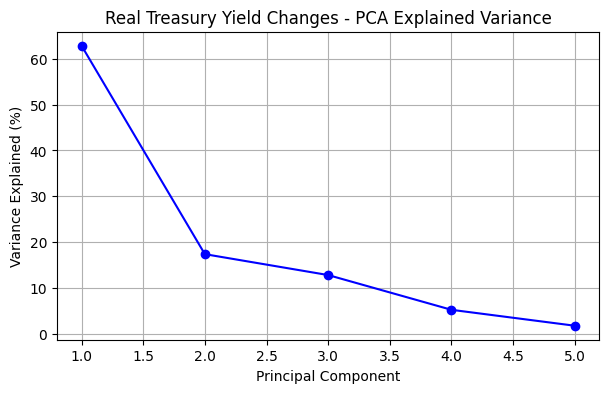

In [2]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 3.e-j Real yield data from FRED 'PCA'
# e- Collect 5 Treasury yields
start = '2025-04-08'
end   = '2025-10-08'
series = ['DGS1MO','DGS3MO','DGS6MO','DGS1','DGS2']

# f- Load data
data = {}
for s in series:
    try:
        df_s = web.DataReader(s, 'fred', start, end)
        if not df_s.empty:
            data[s] = df_s
            print(f"{s} loaded successfully, {df_s.shape[0]} rows")
        else:
            print(f"{s} is empty")
    except Exception as e:
        print(f"Error loading {s}: {e}")

# Check
loaded_series = [s for s in series if s in data]
if not loaded_series:
    raise ValueError("No series were successfully loaded. Check your series names or internet connection.")

# g- Concatenate loaded series
df = pd.concat([data[s] for s in loaded_series], axis=1)
df.columns = loaded_series
df = df.dropna()
print("\nSample of raw yield data:")
print(df.head())

# h- Compute daily yield changes
df_changes = df.diff().dropna()
print("\nSample of daily yield changes:")
print(df_changes.head())

# i- PCA using correlation matrix (standardized data)
scaler = StandardScaler()
X = scaler.fit_transform(df_changes.values)

pca_real = PCA(n_components=X.shape[1])
pca_real.fit(X)

# j- Explained variance
ratios_real = pca_real.explained_variance_ratio_
print("\nExplained Variance Real Data")
for i, r in enumerate(ratios_real, 1):
    print(f"Component {i}: {r:.4f} ({r*100:.2f}%)")

# k- Plot of real data
plt.figure(figsize=(7,4))
plt.plot(range(1, len(ratios_real)+1), ratios_real*100, 'o-', color='blue')
plt.title("Real Treasury Yield Changes - PCA Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.grid(True)
plt.show()


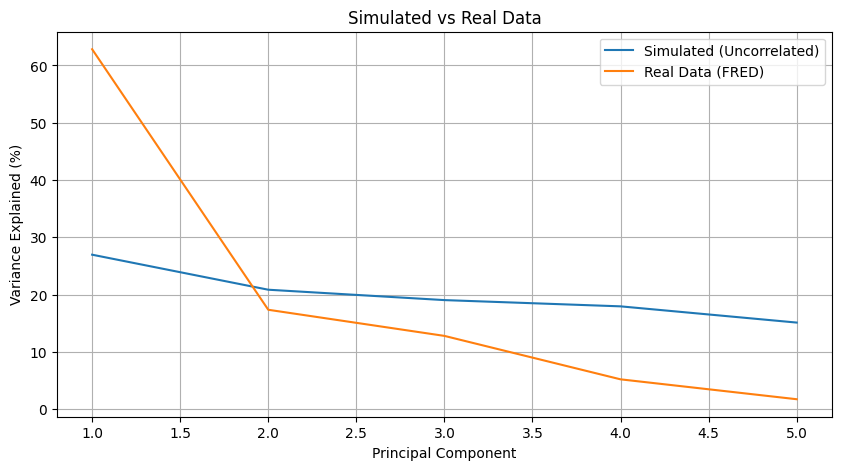

In [3]:
# (j) Comparison: simulated vs real screeplots
plt.figure(figsize=(10,5))
plt.plot(range(1,6), explained_variance_ratio*100, label='Simulated (Uncorrelated)')
plt.plot(range(1, len(ratios_real)+1), ratios_real*100, label='Real Data (FRED)')
plt.title("Simulated vs Real Data")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.legend()
plt.grid(True)
plt.show()


TASK 4

In [4]:
  # Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from numpy import linalg as LA
import yfinance as yf

# List of the 30 largest holdings of XLRE
top30_xlre = [
    "PLD", "AMT", "EQIX", "WELL", "PSA", "SPG", "O", "AVB", "EQR", "INVH",
    "EXR", "MAA", "CPT", "UDR", "ESS", "ARE", "VTR", "REG", "NHI", "FRT",
    "BXP", "VNO", "SLG", "HIW", "CUZ", "PDM", "CIO", "AHH", "PSTL", "ILPT"
]

# Define the study period: around the last 6 months
start = "2025-03-06"
end = "2025-09-06"


# Download historical price data from Yahoo Finance
data = yf.download(top30_xlre, start=start, end=end)
data = data['Close']

# datetime format
data.index = pd.to_datetime(data.index)

# the first few rows
data.head()

/tmp/ipython-input-2964641385.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(top30_xlre, start=start, end=end)
[*********************100%***********************]  30 of 30 completed


Ticker,AHH,AMT,ARE,AVB,BXP,CIO,CPT,CUZ,EQIX,EQR,...,PLD,PSA,PSTL,REG,SLG,SPG,UDR,VNO,VTR,WELL
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-06,8.351662,201.859207,95.140053,212.911575,64.164474,4.938145,118.480186,28.071596,861.972839,69.747505,...,117.066917,299.225830,13.235419,72.308441,57.963535,168.160233,43.294949,38.200001,66.241669,147.629959
2025-03-07,8.549836,207.087860,97.704453,212.862869,66.406906,4.899715,118.159233,28.255451,849.733826,69.805702,...,116.687393,304.610260,13.505529,71.832535,60.047157,164.845978,43.549511,39.750000,66.417824,146.123627
2025-03-10,8.398845,207.848755,97.399391,210.836060,65.608101,4.717177,118.684425,27.345858,821.172729,68.748466,...,114.702225,304.241577,13.881755,71.813118,57.760014,161.227173,43.343906,38.139999,66.065529,144.884872
2025-03-11,8.238418,204.639374,94.634796,207.493790,63.105808,4.659534,117.176926,27.297474,826.718811,67.681549,...,114.030769,299.012390,13.650230,71.589729,55.821758,159.461670,42.864151,36.400002,65.272850,145.965057
2025-03-12,8.210108,201.625092,93.919807,204.667953,63.606262,4.621105,115.153961,27.974831,845.255371,66.895920,...,112.619743,294.394470,13.775640,70.604210,55.802383,161.753906,42.071102,37.369999,64.930344,146.054260


Ticker           AHH       AMT       ARE       AVB       BXP       CIO  \
Date                                                                     
2025-03-07  0.023729  0.025902  0.026954 -0.000229  0.034948 -0.007782   
2025-03-10 -0.017660  0.003674 -0.003122 -0.009522 -0.012029 -0.037255   
2025-03-11 -0.019101 -0.015441 -0.028384 -0.015852 -0.038140 -0.012220   
2025-03-12 -0.003436 -0.014730 -0.007555 -0.013619  0.007930 -0.008247   
2025-03-13 -0.116092  0.005225 -0.018981 -0.010379 -0.032077  0.012474   

Ticker           CPT       CUZ      EQIX       EQR  ...       PLD       PSA  \
Date                                                ...                       
2025-03-07 -0.002709  0.006550 -0.014199  0.000834  ... -0.003242  0.017995   
2025-03-10  0.004445 -0.032192 -0.033612 -0.015145  ... -0.017013 -0.001210   
2025-03-11 -0.012702 -0.001769  0.006754 -0.015519  ... -0.005854 -0.017188   
2025-03-12 -0.017264  0.024814  0.022422 -0.011608  ... -0.012374 -0.015444   
2025-03

<Figure size 1400x700 with 0 Axes>

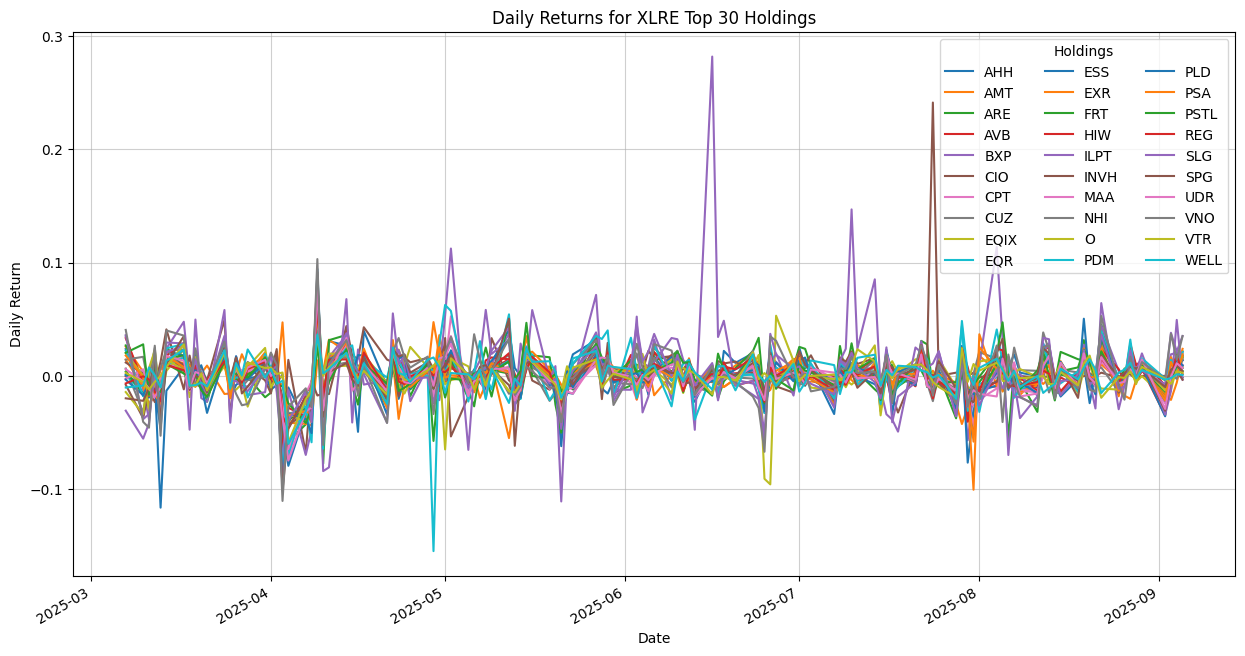

In [5]:
#  Compute daily returns
daily_returns_holding= data.pct_change().dropna()

#Display the first few rows of daily returns
print(daily_returns_holding.head())

# Plot the daily returns for each holding
plt.figure(figsize=(14, 7))
daily_returns_holding.plot(figsize=(15, 8), title="Daily Returns for XLRE Top 30 Holdings")
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(title='Holdings', loc='upper right', ncol=3)
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

In [6]:
# The top 10 holdings
top10 = top30_xlre[:10]

# Computing the covariance matrix for top 10 holdings
cov_matrix= daily_returns_holding[top10].cov()

# The covariance matrix for top 10
cov_matrix

# Compute the correlation matrix for top 5 holdings
corr_matrix = daily_returns_holding[top10].corr()

# Display it
corr_matrix

Ticker,PLD,AMT,EQIX,WELL,PSA,SPG,O,AVB,EQR,INVH
Ticker,,,,,,,,,,
PLD,1.000000,0.101283,0.605551,0.424676,0.691017,0.821068,0.484271,0.734894,0.756247,0.697285
AMT,0.101283,1.000000,0.164749,0.346054,0.440801,-0.048162,0.556743,0.225674,0.261419,0.410946
EQIX,0.605551,0.164749,1.000000,0.394909,0.500300,0.554806,0.333058,0.534317,0.525170,0.473420
WELL,0.424676,0.346054,0.394909,1.000000,0.574451,0.371573,0.589513,0.523033,0.544720,0.566819
PSA,0.691017,0.440801,0.500300,0.574451,1.000000,0.564790,0.727423,0.788243,0.768522,0.785303
SPG,0.821068,-0.048162,0.554806,0.371573,0.564790,1.000000,0.391622,0.744837,0.765099,0.620933
O,0.484271,0.556743,0.333058,0.589513,0.727423,0.391622,1.000000,0.596374,0.620673,0.687108
AVB,0.734894,0.225674,0.534317,0.523033,0.788243,0.744837,0.596374,1.000000,0.967359,0.826959
EQR,0.756247,0.261419,0.525170,0.544720,0.768522,0.765099,0.620673,0.967359,1.000000,0.853674


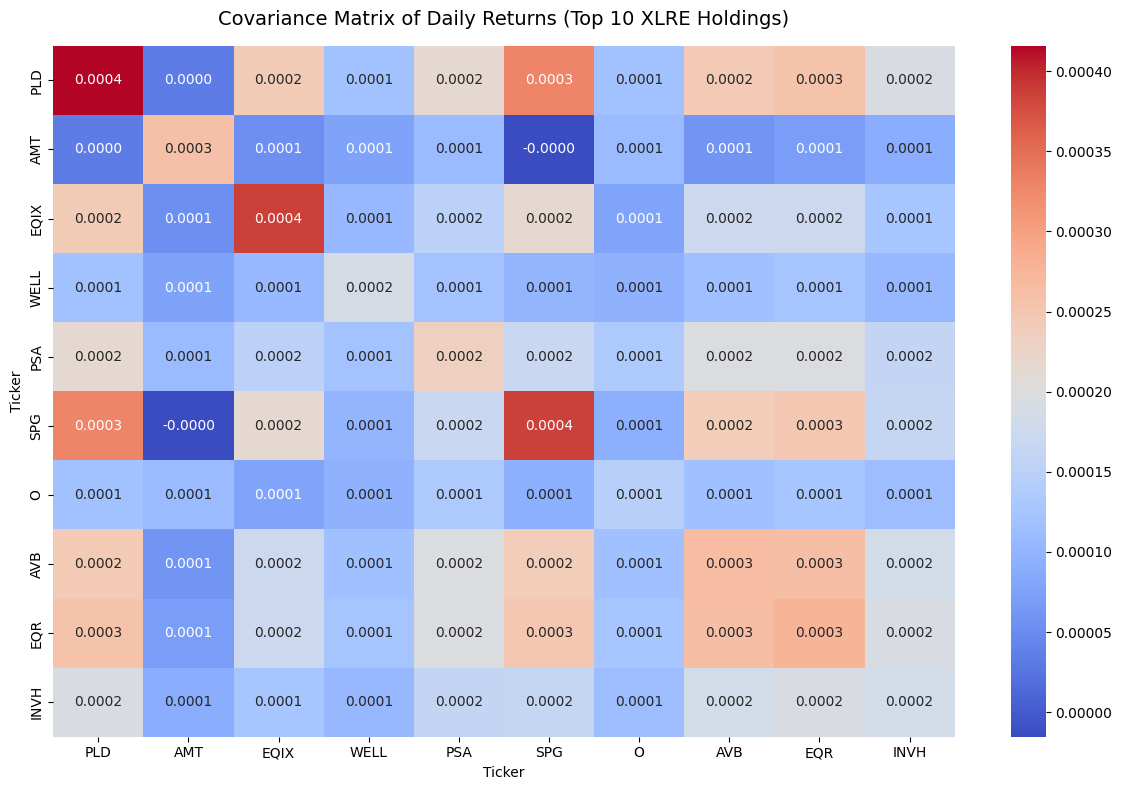

In [7]:
# Plot the Covariance Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    cov_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.4f',
    xticklabels=top10,
    yticklabels=top10
)
plt.title('Covariance Matrix of Daily Returns (Top 10 XLRE Holdings)', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

PC1: Explained Variance = 0.5516, Cumulative = 0.5516
PC2: Explained Variance = 0.1246, Cumulative = 0.6762
PC3: Explained Variance = 0.0670, Cumulative = 0.7432
PC4: Explained Variance = 0.0612, Cumulative = 0.8044
PC5: Explained Variance = 0.0285, Cumulative = 0.8329
PC6: Explained Variance = 0.0234, Cumulative = 0.8563
PC7: Explained Variance = 0.0193, Cumulative = 0.8755
PC8: Explained Variance = 0.0187, Cumulative = 0.8942
PC9: Explained Variance = 0.0167, Cumulative = 0.9109
PC10: Explained Variance = 0.0148, Cumulative = 0.9258
PC11: Explained Variance = 0.0114, Cumulative = 0.9372
PC12: Explained Variance = 0.0096, Cumulative = 0.9468
PC13: Explained Variance = 0.0072, Cumulative = 0.9540
PC14: Explained Variance = 0.0062, Cumulative = 0.9602
PC15: Explained Variance = 0.0054, Cumulative = 0.9656
PC16: Explained Variance = 0.0052, Cumulative = 0.9708
PC17: Explained Variance = 0.0045, Cumulative = 0.9753
PC18: Explained Variance = 0.0043, Cumulative = 0.9796
PC19: Explained Var

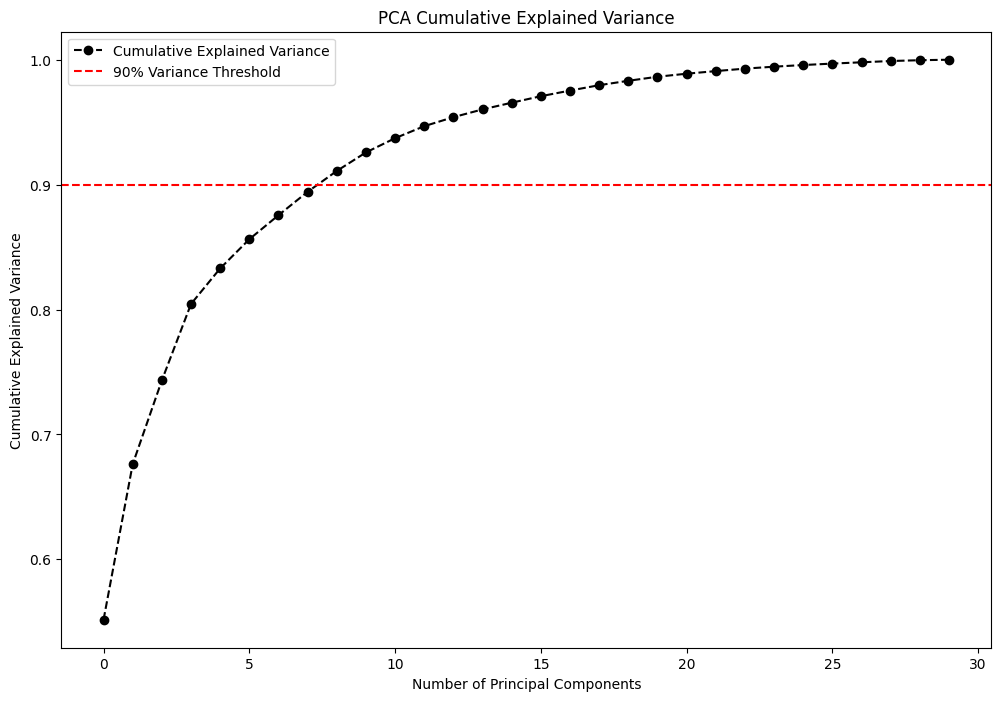

In [8]:
from sklearn.decomposition import PCA

# Fit PCA on daily returns
pca = PCA()
pca.fit(daily_returns_holding)

# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Compute cumulative explained variance
cum_var_pca = explained_var_ratio.cumsum()

for i, (var, cum_var) in enumerate(zip(explained_var_ratio, cum_var_pca), start=1):
    print(f"PC{i}: Explained Variance = {var:.4f}, Cumulative = {cum_var:.4f}")

plt.figure(figsize=(12,8))
plt.plot(cum_var_pca, marker='o', linestyle='--', color='Black', label='Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.title('PCA Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()


PC1: Explained Variance PC= 0.5501, Cumulative = 0.5501
PC2: Explained Variance PC= 0.1256, Cumulative = 0.6757
PC3: Explained Variance PC= 0.0668, Cumulative = 0.7425
PC4: Explained Variance PC= 0.0614, Cumulative = 0.8039
PC5: Explained Variance PC= 0.0284, Cumulative = 0.8323
PC6: Explained Variance PC= 0.0233, Cumulative = 0.8556
PC7: Explained Variance PC= 0.0199, Cumulative = 0.8755
PC8: Explained Variance PC= 0.0187, Cumulative = 0.8942
PC9: Explained Variance PC= 0.0167, Cumulative = 0.9109
PC10: Explained Variance PC= 0.0148, Cumulative = 0.9257
PC11: Explained Variance PC= 0.0115, Cumulative = 0.9372
PC12: Explained Variance PC= 0.0096, Cumulative = 0.9468
PC13: Explained Variance PC= 0.0072, Cumulative = 0.9540
PC14: Explained Variance PC= 0.0062, Cumulative = 0.9602
PC15: Explained Variance PC= 0.0054, Cumulative = 0.9656
PC16: Explained Variance PC= 0.0052, Cumulative = 0.9708
PC17: Explained Variance PC= 0.0045, Cumulative = 0.9753
PC18: Explained Variance PC= 0.0043, Cum

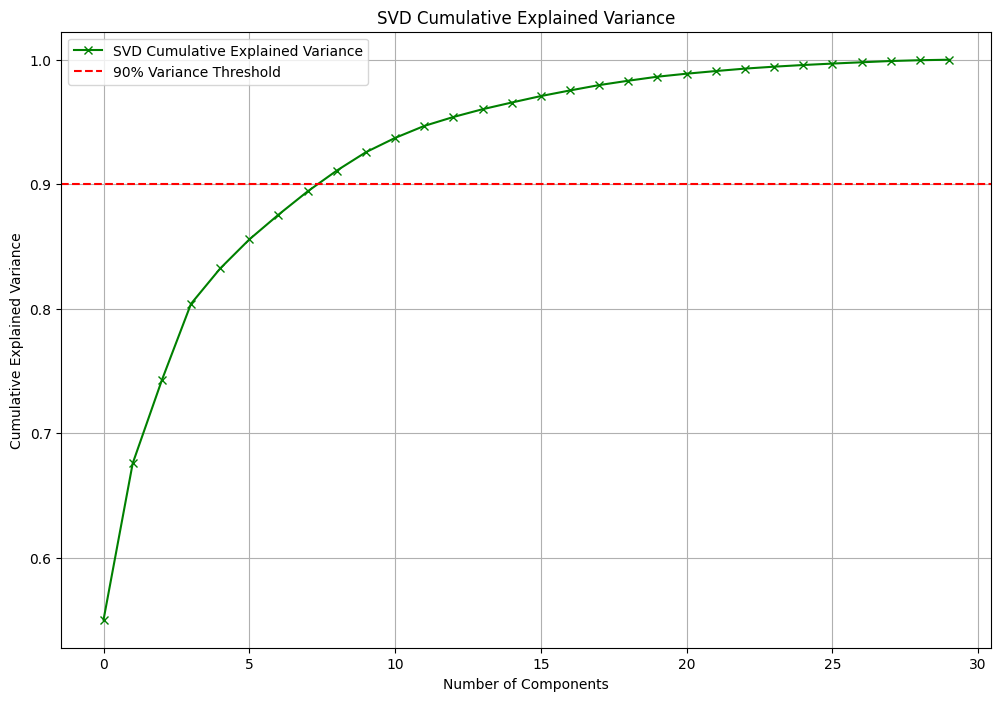

In [9]:
# Compute SVD
U, sigma, Vt = np.linalg.svd(daily_returns_holding, full_matrices=False)

# Variance ratio
singular_values_squared = sigma**2
explained_var_svd = singular_values_squared / np.sum(singular_values_squared)

#cumulative explained variance
cum_var_svd = np.cumsum(explained_var_svd)

for i, (var, cum_var) in enumerate(zip(explained_var_svd, cum_var_svd), start=1):
    print(f"PC{i}: Explained Variance PC= {var:.4f}, Cumulative = {cum_var:.4f}")

plt.figure(figsize=(12,8))
plt.plot(cum_var_svd, marker='x', linestyle='-', color='g', label='SVD Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('SVD Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


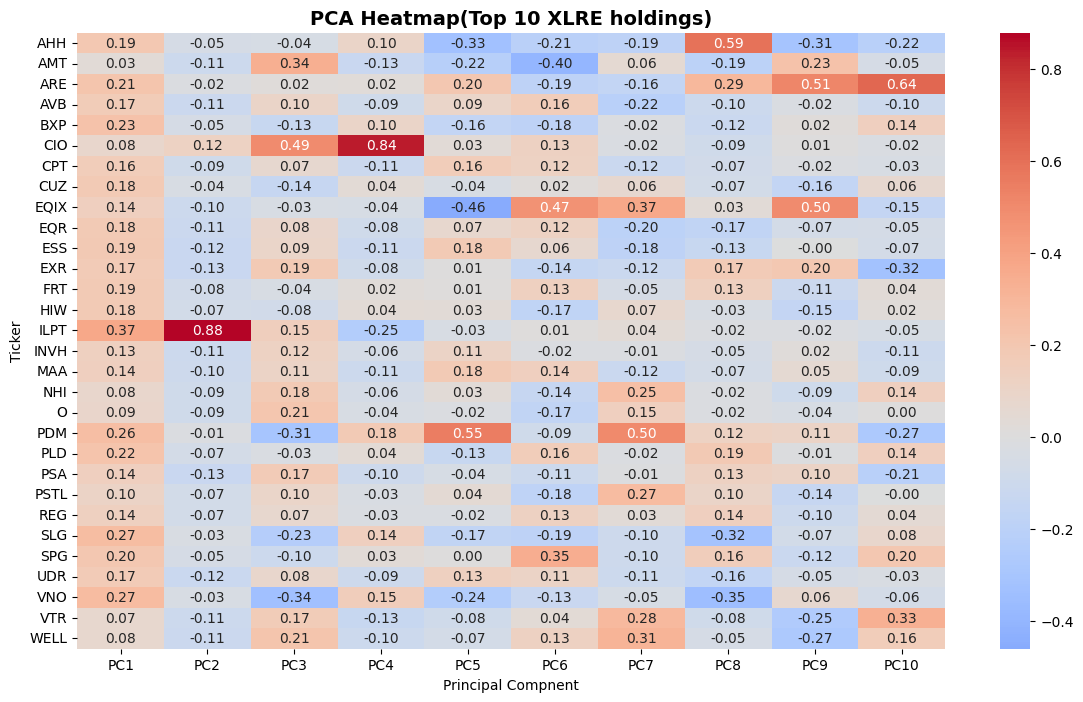

In [10]:
# PCA Heatmap
# Matrice des coefficients (loadings)
loadings = pd.DataFrame(
    pca.components_[:10].T,
    index=daily_returns_holding.columns,
    columns=[f'PC{i+1}' for i in range(10)]
)

# Affichage du heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(loadings, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('PCA Heatmap(Top 10 XLRE holdings)', fontsize=14, fontweight='bold')
plt.xlabel('Principal Compnent')
plt.ylabel('Ticker')
plt.show()


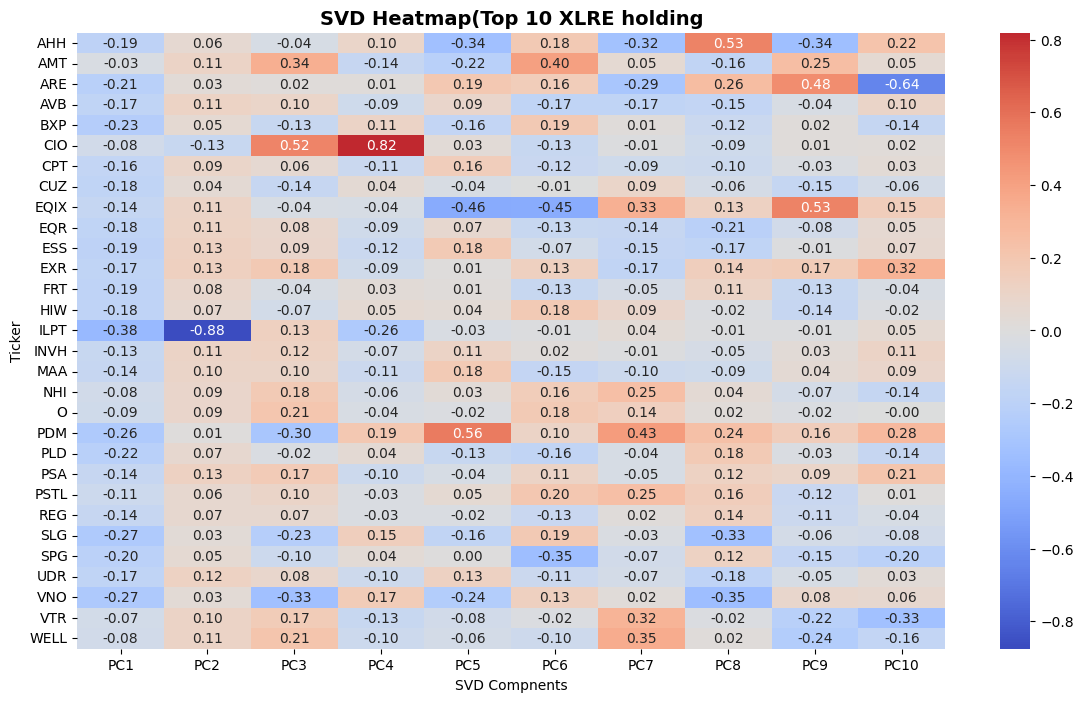

In [11]:

#SVD heatmap
loadings_svd = pd.DataFrame(
    Vt[:10].T,
    index=daily_returns_holding.columns,
    columns=[f'PC{i+1}' for i in range(10)]
)

#Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(loadings_svd, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('SVD Heatmap(Top 10 XLRE holding', fontsize=14, fontweight='bold')
plt.xlabel('SVD Compnents')
plt.ylabel('Ticker')
plt.show()
